In [149]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from proj1_helpers import *
from implementations import *
from plots import *
from utils import *
from validation import *
from preproccess_utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [150]:
import datetime
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here

labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [151]:
# splitting data for the training and validation
seed = 46
np.random.seed(seed)
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(input_data, labels, ratio=ratio, seed=seed)

In [152]:
# splitting into 4 groups and removing -999
x_trains, y_trains, del_columns, mean_of_all_col = preproccess(x_train, y_train)

these are the deleted columns:  {'0': [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], '1': [4, 5, 6, 12, 22, 26, 27, 28], '2': [22], '3': [22]}


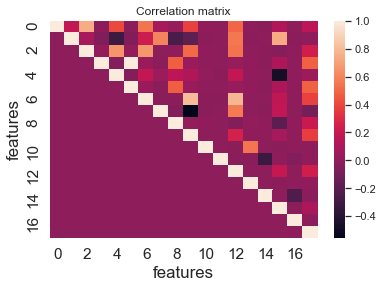

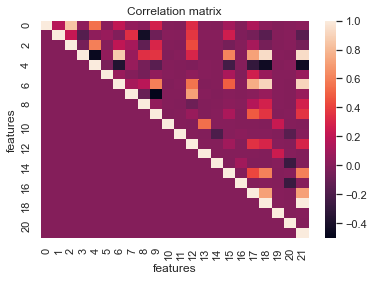

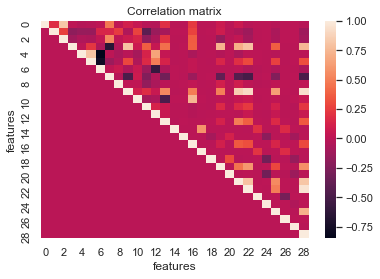

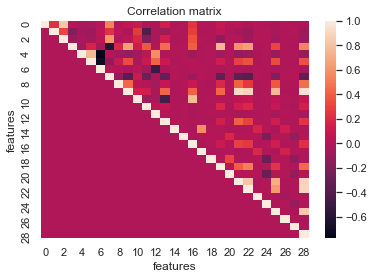

In [153]:
# heatmap : Inspect the correlated features
correlation_plot(x_trains[0])
correlation_plot(x_trains[1])
correlation_plot(x_trains[2])
correlation_plot(x_trains[3])

In [154]:
# remove correlated columns
x_trains, del_columns_cor = correletions(x_trains)

these are the deleted columns:  {'0': [9, 5], '1': [21, 18, 6, 2], '2': [28, 22, 21, 9, 5, 2], '3': [28, 22, 21, 2]}


In [155]:
# remove outliers
x_trains, y_trains = remove_outliers(x_trains, y_trains)

In [156]:
# data normalization
x_trains, y_trains, means, stds = normalization(x_trains, y_trains)

jet : 1, shape y : (78862,), shape x : (78862, 17)
jet : 2, shape y : (60674,), shape x : (60674, 19)
jet : 3, shape y : (39199,), shape x : (39199, 24)
jet : 4, shape y : (17122,), shape x : (17122, 26)


In [161]:
# applying preprocces to the test
x_tests, y_tests = preproccess_test(x_test, y_test, del_columns, del_columns_cor, means, stds, mean_of_all_col)

## Do your thing crazy machine learning thing here :) ...

## Least Squares GD

In [32]:
max_iters = 1000
gamma = 0.09
y_preds = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = least_squares_GD(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
    
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.74424


### Cross validation for least squares GD

100%|██████████| 10/10 [03:57<00:00, 23.79s/it]


Accuracy is 0.7488


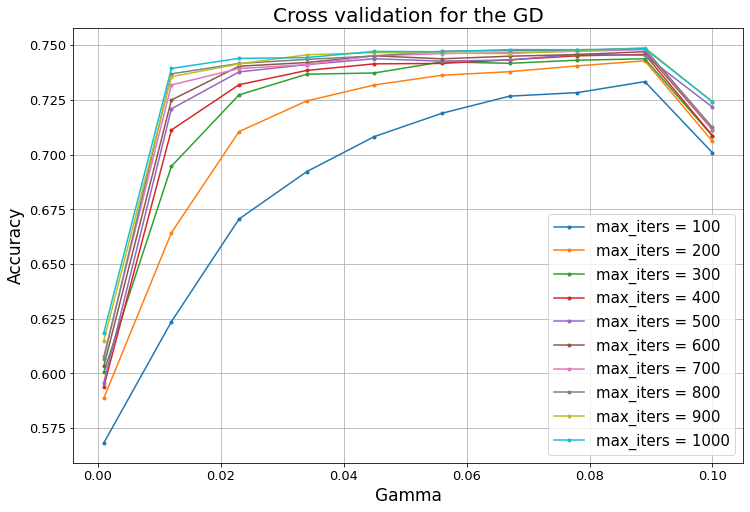

In [31]:
# parameters setting
type_ = 'GD'
bd_left = -3
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(100, 1100, 100)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**In this setting the best gamma = 0.09 and the best max_iter = 1000.  
Best accutacy = 0.74272**

## Least Squares SGD

In [35]:
max_iters = 1500
gamma = 0.2
y_preds = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = least_squares_SGD(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.73534


### Cross validation for least squares SGD

100%|██████████| 11/11 [05:31<00:00, 30.15s/it]


Accuracy is 0.7408


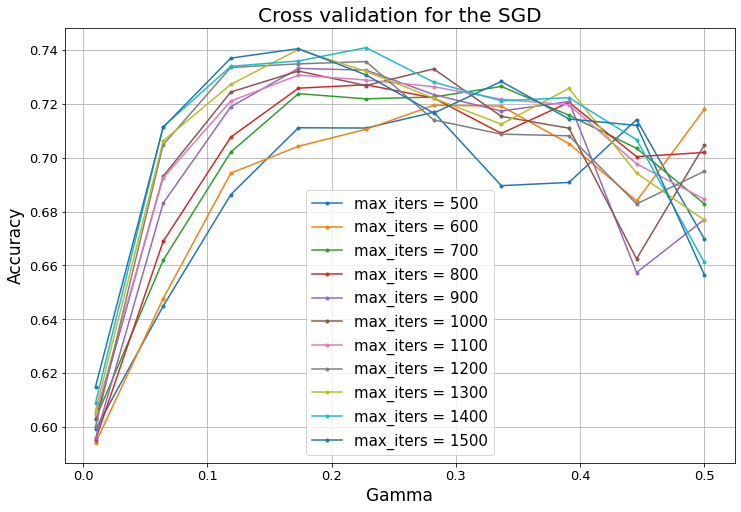

In [34]:
# parameters setting
type_ ='SGD'
bd_left = -2
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 5*10**bd_right, 10)
max_iters = np.arange(500, 1600, 100)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**In this setting the best gamma = 0.2 and the best max_iter = 1500.  
Best accutacy = 0.73534**

## Least Squares

In [36]:
y_preds = []
for i in range(4):
    w, loss = least_squares(y_trains[i], x_trains[i])

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)

print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.75578


## Ridge regression

### without degree

In [37]:
lambda_ = 1e-5
y_preds = []
for i in range(4):
    w, loss = ridge_regression(y_trains[i], x_trains[i], lambda_)
    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7558


### with degree

In [162]:
lambda_ = 1e-5
y_preds = []
degree = 8
w_rr = []
for i in range(4):
    x_train_poly = build_poly(x_trains[i], degree)
    x_test_poly = build_poly(x_tests[i], degree)
    w, loss = ridge_regression(y_trains[i], x_train_poly, lambda_)
    w_rr.append(w)
    y_pred = predict_labels(w, x_test_poly)
    y_preds.append(y_pred)
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.8231


100%|██████████| 10/10 [13:33<00:00, 81.39s/it] 


Accuracy is 0.8250


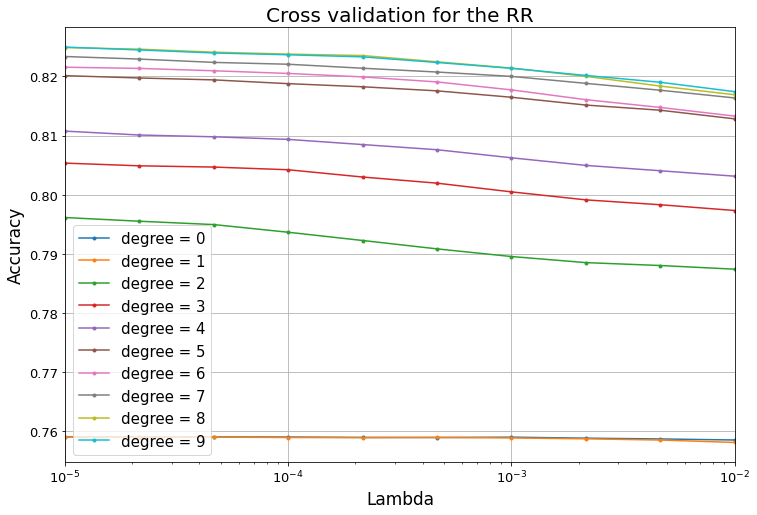

In [45]:
# parameters setting
type_ = 'RR'
bd_left = -5
bd_right = -2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(0, 10)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

**Best degree is 8, best lambda is 1e-5**

100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


Accuracy is 0.7591


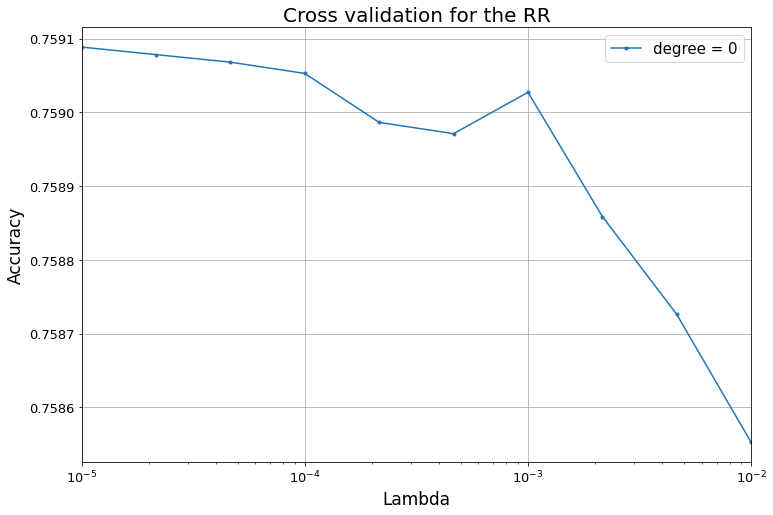

In [47]:
# parameters setting
type_ = 'RR'
bd_left = -5
bd_right = -2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

**The best lambda is between 1e-5 and 1e-3**

## Logistic Regression

In [53]:
max_iters = 1000
gamma = 0.5
y_preds = []
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = logistic_regression(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_tests[i])
    y_preds.append(y_pred)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.74566


### Cross validation for logistic regression

100%|██████████| 10/10 [12:17<00:00, 73.73s/it] 


Accuracy is 0.7506


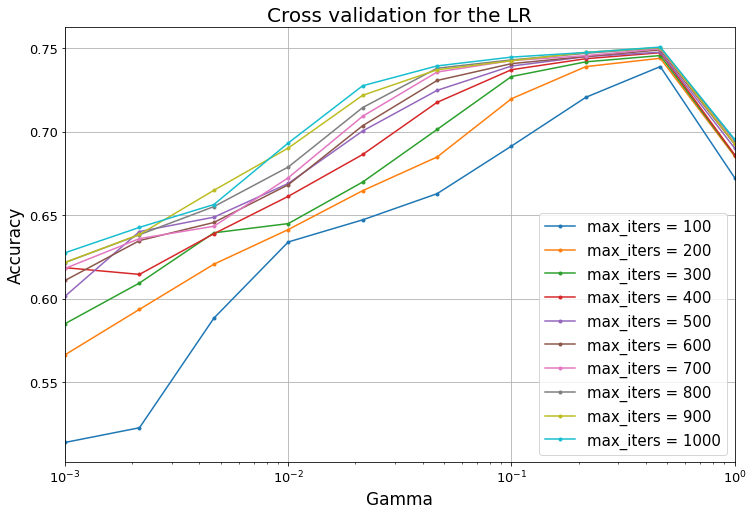

In [50]:
# parameters setting
type_ = 'LR'
bd_left = -3
bd_right = 0
# grid for hyperparameters
# gammas = np.linspace(10**bd_left, 10**bd_right, 10)
gammas = np.logspace(bd_left, bd_right, 10)
max_iters = np.arange(100, 1100, 100)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**Best gamma is 0.5, max_iters = 1000**

## Logistic Regression with Regularization

### with degree

In [62]:
max_iters = 1000
gamma = 0.5
lambda_ = 1e-4
y_preds = []
w_lrr = []
degree = 1
np.random.seed(seed)
for i in range(4):
    x_train_poly = build_poly(x_trains[i], degree)
    x_test_poly = build_poly(x_tests[i], degree)
    initial_w = np.random.rand((x_train_poly.shape[1]))
    w, loss = reg_logistic_regression(y_trains[i], x_train_poly, lambda_, initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_test_poly)
    y_preds.append(y_pred)
    w_lrr.append(w)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.6791


### without degree

In [58]:
max_iters = 1000
gamma = 0.5
lambda_ = 1e-4
y_preds = []
w_lrr = []
np.random.seed(seed)
for i in range(4):
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = reg_logistic_regression(y_trains[i], x_trains[i], lambda_, initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_tests[i])
    y_preds.append(y_pred)
    w_lrr.append(w)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.74606


### Cross validation for logistic regression with regularizarion

100%|██████████| 3/3 [06:49<00:00, 136.38s/it]


Accuracy is 0.7511


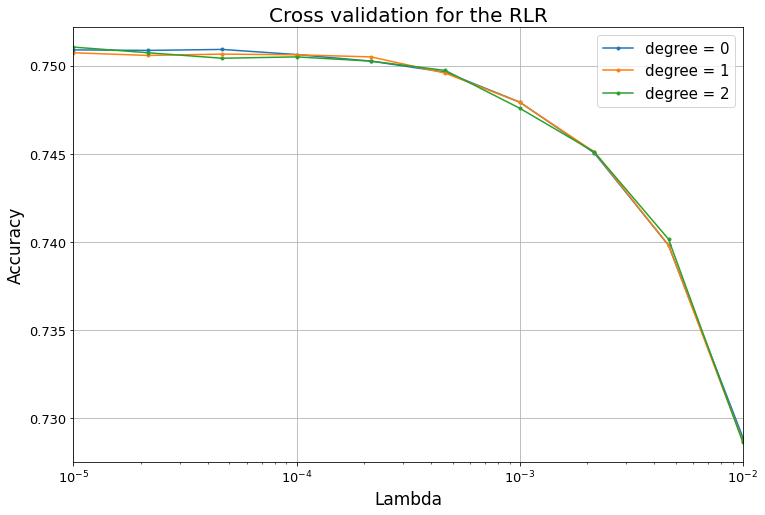

In [57]:
# parameters setting
type_ = 'RLR'
bd_left = -5
bd_right = -2
max_iters = 1000
gammas = 0.5
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(3)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)

100%|██████████| 1/1 [02:12<00:00, 132.64s/it]


Accuracy is 0.7509


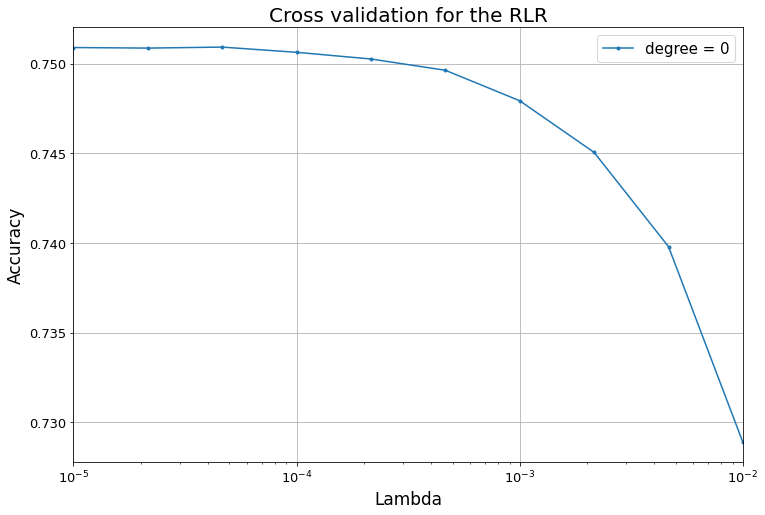

In [56]:
# parameters setting
type_ = 'RLR'
bd_left = -5
bd_right = -2
max_iters = 1000
gammas = 0.5
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)

**Best lambda is 1e-4**

### confusion matrix :

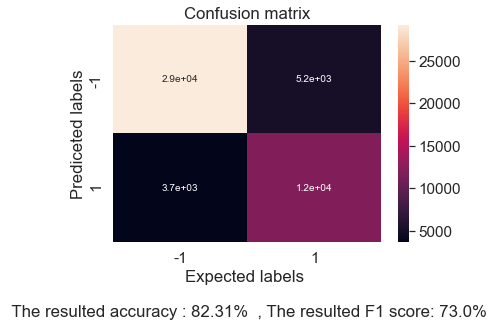

In [166]:
confusion_matrix(y_tests,np.array(np.concatenate(y_preds)))

## Generate predictions and save ouput in csv format for submission:

In [3]:
DATA_TEST_PATH = 'data/test.csv'  # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [11]:
jet_groups_test, jet_idxs = preproccess_test(tX_test, ids_test, del_columns, del_columns_cor, means, stds)

### For NOT logistic regression

In [16]:
y_preds = []
for i in range(4):
#     jet_groups_test[i] = build_poly(jet_groups_test[i], degree=3)
    y_pred = predict_labels(w_rr[i], jet_groups_test[i])
    y_preds.append(y_pred)
final_pred = np.array(np.concatenate(y_preds))

### For logistic regression

In [14]:
y_preds = []
for i in range(4):
    y_pred = predict_labels_for_log(w_lrr[i], jet_groups_test[i])
    y_preds.append(y_pred)
final_pred = np.array(np.concatenate(y_preds))

In [17]:
OUTPUT_PATH = 'data/pred.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(jet_idxs, final_pred, OUTPUT_PATH)